# <a id='toc1_'></a>[OilyGiant](#toc0_)
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.
  
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.
  
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
  
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
  
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

**Table of contents**<a id='toc0_'></a>    
- [OilyGiant](#toc1_)    
  - [Inicialización y carga de datos](#toc1_1_)    
  - [Exploración inicial de datos](#toc1_2_)    
  - [Análisis Exploratorio de Datos](#toc1_3_)    
  - [Entrenamiento y prueba del modelo de Regresión Lineal](#toc1_4_)    
    - [Segmentación de datos](#toc1_4_1_)    
    - [Entrenamiento de los modelos](#toc1_4_2_)    
      - [geo_0](#toc1_4_2_1_)    
      - [geo_1](#toc1_4_2_2_)    
      - [geo_2](#toc1_4_2_3_)    
  - [Cálculo de ganancias](#toc1_5_)    
  - [Cálculo de riesgos](#toc1_6_)    
    - [geo_0](#toc1_6_1_)    
    - [geo_1](#toc1_6_2_)    
    - [geo_2](#toc1_6_3_)    
  - [Conclusiones](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Inicialización y carga de datos](#toc0_)

In [63]:
# Importamos las librerias pertinentes
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
# De ahi guardamos las tablas en variables separadas
geo_0 = pd.read_csv('../datasets/geo_data_0.csv')
geo_1 = pd.read_csv('../datasets/geo_data_1.csv')
geo_2 = pd.read_csv('../datasets/geo_data_2.csv')

## <a id='toc1_2_'></a>[Exploración inicial de datos](#toc0_)

In [65]:
# Primero observemos si hay algun error evidente en los datos de geo_0
geo_0.info()
geo_0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


Para nuestra suerte, la tabla `geo_0` no presenta ningun valor ausente y los *dtypes* de las columnas parecen corresponder perfectamente. Ya cuando veamos todas vamos a desarrollar que significa cada columna.

In [66]:
# Veamos lo mismo con geo_1
geo_1.info()
geo_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [67]:
# Como geo_1 esta bien, veamos a geo_2
geo_2.info()
geo_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Para nuestra suerte tenemos las 3 tablas sin ningun error fundamental como valores ausentes, errores de tipo en las columnas o algo más. Veamos entonces, que significan las columnas de las tablas?
- **id** — identificador único de pozo de petróleo
- **f0, f1, f2** — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- **product** — volumen de reservas en el pozo de petróleo (miles de barriles).
  
Nuestro objetivo en éste caso es la columna **product**, vamos a tener que crear un modelo que nos de unas predicciones sobre donde encontrar las mejores zonas y con esos datos vamos a trabajar para lograr la decision final.
  
Antes de crear dicho modelo, mejor veamos un poco en detalle los datos para ver si obtenemos algunos conceptos claves.

## <a id='toc1_3_'></a>[Análisis Exploratorio de Datos](#toc0_)
  
En ésta parte vamos a indagar un poco sobre las distribuciones de los datos, sus relaciones y ver que reflejan los mismos. Tambien vamos a buscar *outliers* que puedan entorpecer el modelo.
  
Primero, quiero recordar un par de valores mencionados al comienzo para poder establecer límites y poder ver los datos con mayor claridad.
1. El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

2. Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares.
  
Sabemos que cada fila de la tabla es un pozo petrolero y que cada unidad de su columna `product` representa entonces 4,500 USD. Si dividimos 100,000,000 USD en 200 obtenemos el precio de 1 pozo petrolero que es de 500,000 USD.
  
Por lo tanto ahora solo queda dividir los 500,000 USD del precio de cada pozo petrolero en los 4,500 USD de ingreso que representa cada unidad, lo que nos da un valor de 111,11. Ésto quiere decir que para que un pozo sea rentable y represente ganancias debe tener más de 111,11 unidades.
  
Perfecto, tenemos el número mágico! Ahora veamos como se distribuyen las columnas `product` en las diferentes regiones.

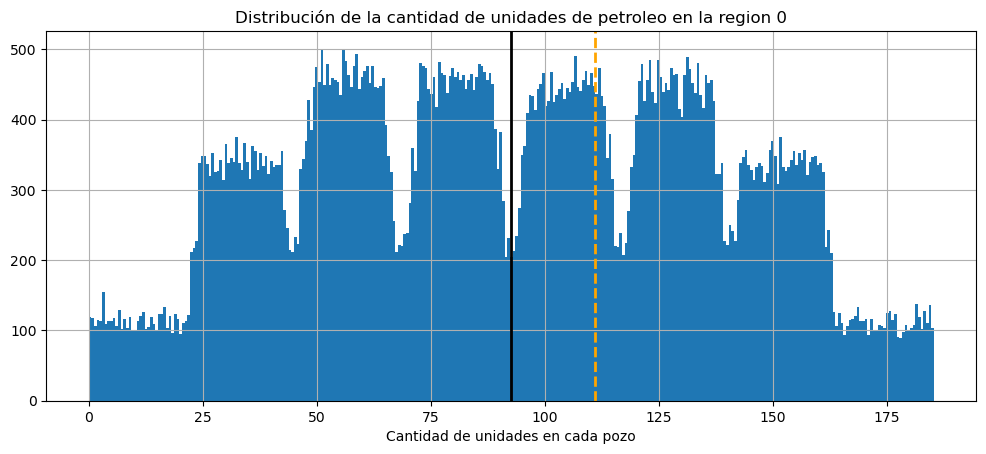

Promedio: 92.500


In [68]:
# Primero creamos el espacio para trabajar
fig, ax = plt.subplots(figsize=(12,4.8))

# Definimos los bins con facilidad ya que todas las tablas tienen el mismo tamaño
bins = int(np.ceil(np.sqrt(100000)))

# Definimos los histogramas
geo_0['product'].hist(bins = bins)

# Agregamos una linea que marque el "numero magico" y otra que nos muestre el promedio
plt.axvline(x=111.11, color='orange', linestyle='--', linewidth=2)
plt.axvline(x=geo_0['product'].mean(), color='black', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Cantidad de unidades en cada pozo')
ax.set_title('Distribución de la cantidad de unidades de petroleo en la region 0')

plt.show()

# Por ultimo, quiero ver tambien el valor concreto del promedio
print(f'Promedio: {geo_0["product"].mean():.3f}')

In [69]:
# Tambien quiero ver cuántas filas superan el 111
geo_0[geo_0['product'] > 111.11].shape[0]

36584

Una distribución interesante por decir poco. Vemos como hay 4 picos centrales con pocos valores entre ellos y otros 2 picos más chicos a los costados de los 4 previamente mencionados. Tambien vemos que hay una leve concentracion en los extremos, aunque me llama la atención como se corta abruptamente a la derecha, acaso los datos ya fueron refinados de outliers?
  
Por aparte, vemos como solo 36584 pozos superaron las 111,11 unidades (o el 36,58%) necesario para generar ganancias respecto al costo de construcción del pozo petrolifero.

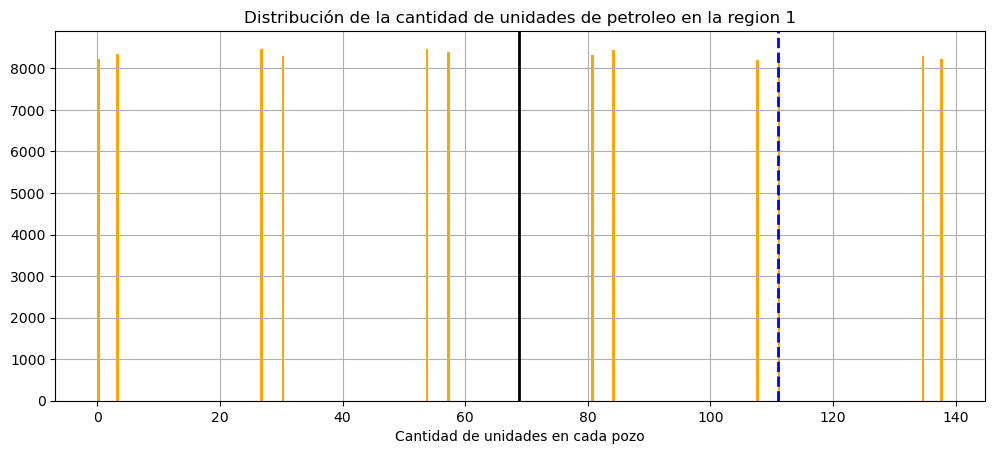

Promedio: 68.825


In [70]:
# Primero creamos el espacio para trabajar
fig, ax = plt.subplots(figsize=(12,4.8))

# Definimos los bins con facilidad ya que todas las tablas tienen el mismo tamaño
bins = int(np.ceil(np.sqrt(100000)))

# Definimos los histogramas
geo_1['product'].hist(bins = bins, color='orange')


# Agregamos una linea que marque el "numero magico"
plt.axvline(x=111.11, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=geo_1['product'].mean(), color='black', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Cantidad de unidades en cada pozo')
ax.set_title('Distribución de la cantidad de unidades de petroleo en la region 1')

plt.show()

# Por ultimo, quiero ver tambien el valor concreto del promedio
print(f'Promedio: {geo_1["product"].mean():.3f}')

Hablabamos de interesante y... ciertamente ésto me llama más la atención. Al parecer hubo un problema con la carga de los datos ya que extrañamente vemos como todos están concentrados en puntos muy específicos... lo que, no parece muy realista. Con eso de lado, tambien vemos como aproximadamente 16,000 pozos se encuentran por encima del punto de inflexión.

In [71]:
# Indaguemos un poco más respecto a cuales son éstos valores
geo_1['product'].value_counts()

product
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: count, dtype: int64

Efectivamente, vemos como los valores se encuentran todos dentro de 12 valores discretos y extrañamente específicos (incluso, podemos ver que hay valores en 0.0). Ahora que lo veo bien, se nota claramente en la tabla los valores repetidos aunque supongo que uno se pierde entre tantos números.
  
Lamentablemente solo tenemos 3 regiones y perder 33% de nuestros datos no suena muy prometedor... por lo tanto, haremos con lo que tenemos! Tras una vista a los valores concretos, no creo que la region 1 salga como la ganadora de nuestro trabajo pero veamos que tal sale!

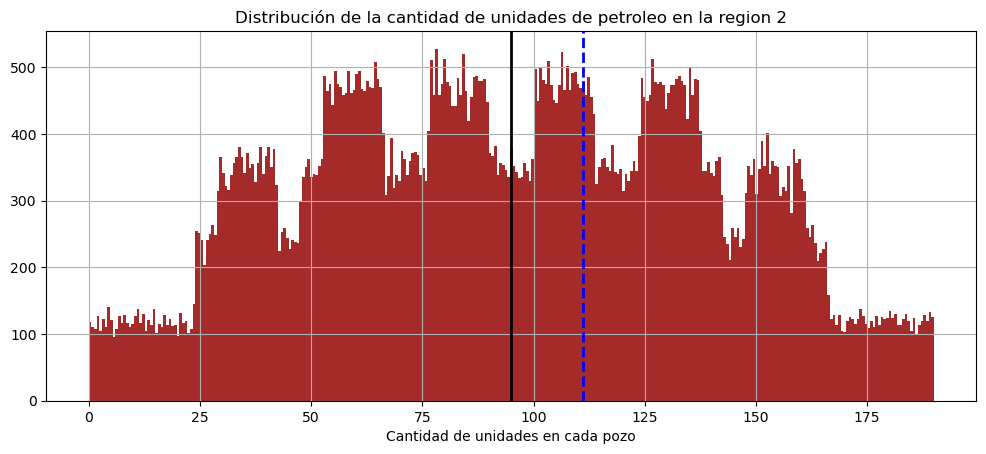

Promedio: 95.000


In [72]:
# Finalmente veamos los datos de geo_2
# Primero creamos el espacio para trabajar
fig, ax = plt.subplots(figsize=(12,4.8))

# Definimos los bins con facilidad ya que todas las tablas tienen el mismo tamaño
bins = int(np.ceil(np.sqrt(100000)))

# Definimos los histogramas
geo_2['product'].hist(bins = bins, color='brown')

# Agregamos una linea que marque el "numero magico"
plt.axvline(x=111.11, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=geo_2['product'].mean(), color='black', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Cantidad de unidades en cada pozo')
ax.set_title('Distribución de la cantidad de unidades de petroleo en la region 2')

plt.show()

# Por ultimo, quiero ver tambien el valor concreto del promedio
print(f'Promedio: {geo_2["product"].mean():.3f}')

Al parecer vemos una distribucion muy similar a la de `geo_0` aunque con la media mas cercana a al punto de quiebre. De primera vista, parece que ésta región es más prometedora pero dado que ninguna tiene una media por encima del punto de quiebre no podemos sacar conclusiones concretas ahora mismo.
  
**¿Que obtuvimos de el EDA?**
Mirar los datos por más superficial que sea nos dió dos piezas de información muy importantes:
1. No podemos usar la tabla `geo_1` dado que hubo algún problema que causó que los datos no sean óptimos para trabajar, al menos tenemos 2 tablas para usar.
2. Ahora mismo no hay ninguna región que se demuestre rentable a primera vista ya que los promedios de ambas tablas son menores que el punto de quiebre.
  
Por lo tanto, ahora debemos pasar a la siguiente etapa en la que vamos a desarrollar un modelo de Regresión Lineal para cada región que nos haga predicciones y veremos cuál es la que mayor potencial de ganancias presenta.

## <a id='toc1_4_'></a>[Entrenamiento y prueba del modelo de Regresión Lineal](#toc0_)
  
Ahora vamos a pasar a la parte del modelo de machine learning. Para este caso vamos a usar el modelo de Regresión Lineal ya que nos enfrentamos a un caso de... regresión y no clasificación. Sin más preambulo, vamos allá.

### <a id='toc1_4_1_'></a>[Segmentación de datos](#toc0_)

In [73]:
# Primero tenemos que separar los datos en features y target
features_0 = geo_0[['f0', 'f1', 'f2']]
target_0 = geo_0['product']

# De ahi geo_1
features_1 = geo_1[['f0', 'f1', 'f2']]
target_1 = geo_1['product']

# Ahora lo mismo para geo_2
features_2 = geo_2[['f0', 'f1', 'f2']]
target_2 = geo_2['product']

Como se puede ver, no guardamos las columnas `id` ya que no nos iban a resultar utiles para el modelo.

In [74]:
# Ahora vamos a separar los conjuntos de entrenamiento y de prueba

# Primero separemos los de geo_0
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(
    features_0, target_0, test_size= 0.25, random_state= 85964)

# Posteriormente los de geo_1
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(
    features_1, target_1, test_size= 0.25, random_state= 85964)

# De ahi los de geo_2
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(
    features_2, target_2, test_size= 0.25, random_state= 85964)

### <a id='toc1_4_2_'></a>[Entrenamiento de los modelos](#toc0_)
  
Ahora nos vamos a dedicar a entrenar los modelos para cada conjunto de datos. Al ser una función matemática LinearRegression no posee una gran cantidad de hiperparámetros para refinar.

#### <a id='toc1_4_2_1_'></a>[geo_0](#toc0_)

In [75]:
# Primero cargamos el modelo de geo_0
model_geo_0 = LinearRegression()

In [76]:
# Ahora lo entrenamos
model_geo_0.fit(features_0_train, target_0_train)

LinearRegression()

In [77]:
# Finalmente guardamos las predicciones junto con las respuestas correctas
# Tenemos que reiniciar el índice del conjunto de validación y transformar las predicciones a Series
predictions_0 = pd.concat(
    [target_0_valid.reset_index(drop= True), pd.Series(model_geo_0.predict(features_0_valid))], axis= 1
)

In [78]:
# Cambiamos los nombres de las columnas
predictions_0 = predictions_0.rename(columns= {
    'product': 'real_value',
    0:'prediction'
})

In [79]:
# Veamos entonces como quedo
predictions_0

,real_value,prediction
0,68.077172,43.932379
1,59.431029,115.670378
2,167.877901,102.373501
3,134.965417,79.732264
4,148.136790,99.487249
...,...,...
24995,146.157947,90.255225
24996,40.851577,64.683172
24997,13.229072,92.008923
24998,100.788405,101.440027


In [80]:
# Ahora veamos los siguientes valores
print(f'''
Volumen promedio de reservas previstas: {predictions_0['prediction'].mean():.4f} \n
RECM del modelo: {mean_squared_error(predictions_0['real_value'],predictions_0['prediction'])**0.5:.4f}
''')


Volumen promedio de reservas previstas: 92.5367 

RECM del modelo: 37.7451



#### <a id='toc1_4_2_2_'></a>[geo_1](#toc0_)

In [81]:
# Primero cargamos el modelo de geo_0
model_geo_1 = LinearRegression()

In [82]:
# Ahora lo entrenamos
model_geo_1.fit(features_1_train, target_1_train)

LinearRegression()

In [83]:
# Finalmente guardamos las predicciones junto con las respuestas correctas
# Tenemos que reiniciar el índice del conjunto de validación y transformar las predicciones a Series
predictions_1 = pd.concat(
    [target_1_valid.reset_index(drop= True), pd.Series(model_geo_1.predict(features_1_valid))], axis= 1
)

In [84]:
# Cambiamos los nombres de las columnas
predictions_1 = predictions_1.rename(columns= {
    'product': 'real_value',
    0:'prediction'
})

In [85]:
# Veamos entonces como quedo
predictions_1

,real_value,prediction
0,84.038886,83.750162
1,134.766305,135.364841
2,134.766305,136.093130
3,134.766305,135.827082
4,107.813044,108.197564
...,...,...
24995,110.992147,110.622635
24996,0.000000,1.255047
24997,107.813044,108.857192
24998,3.179103,2.924738


In [86]:
# Ahora veamos los siguientes valores
print(f'''
Volumen promedio de reservas previstas: {predictions_1['prediction'].mean():.4f} \n
RECM del modelo: {mean_squared_error(predictions_1['real_value'],predictions_1['prediction'])**0.5:.4f}
''')


Volumen promedio de reservas previstas: 68.9255 

RECM del modelo: 0.8884



#### <a id='toc1_4_2_3_'></a>[geo_2](#toc0_)

In [87]:
# Cargamos una vez mas el modelo
model_geo_2 = LinearRegression()

In [88]:
# Lo entrenamos con los datos de geo_2
model_geo_2.fit(features_2_train, target_2_train)

LinearRegression()

In [89]:
# Y seguimos el procedimiento para crear la tabla con los valores reales y las predicciones
predictions_2 = pd.concat(
    [target_2_valid.reset_index(drop= True), pd.Series(model_geo_2.predict(features_2_valid))], axis= 1
)

In [90]:
# Cambiamos los nombres de las columnas
predictions_2 = predictions_2.rename(columns= {
    'product': 'real_value',
    0:'prediction'
})

In [91]:
# Veamos el resultado
predictions_2

,real_value,prediction
0,125.720167,101.711068
1,85.483887,78.034615
2,91.337368,69.241097
3,66.343315,87.525741
4,46.225876,89.832948
...,...,...
24995,93.229843,72.145886
24996,54.510304,81.029650
24997,113.840910,96.921233
24998,134.151028,106.616293


In [92]:
# Y miramos las métricas también
print(f'''
Volumen promedio de reservas previstas: {predictions_2['prediction'].mean():.4f} \n
RECM del modelo: {mean_squared_error(predictions_2['real_value'],predictions_2['prediction'])**0.5:.4f}
''')


Volumen promedio de reservas previstas: 95.0731 

RECM del modelo: 40.0505



Entonces recapitulemos:
- Modelo geo_0
    - Volumen promedio de las predicciones: 92.5367
    - RECM del modelo: 37.7451
- Modelo geo_0
    - Volumen promedio de las predicciones: 68.9255 
    - RECM del modelo: 0.8884
- Modelo geo_2
    - Volumen promedio de las predicciones: 95.0731 
    - RECM del modelo: 40.0505
  
De lo que podemos ver, la región 0 presenta un promedio y un RECM menor siendo el promedio ~2.45 veces el RECM mientras tanto el volumen promedio de la región 2 es mayor con un RECM también mayor pero con el promedio siendo ~2.37 veces el RECM.
  
A que me refiero con 2.45 y 2.37? Es muy simple, ya que no se pueden comparar directamente los RECM de dos conjuntos de datos diferentes prefiero apelar a la adimensionalidad de una fracción que me informe que tanto es el RECM con respecto al promedio de su conjunto de datos. Por lo tanto: 
  
$$
\frac{92.5367}{37.7451} = 2.45
$$
  
$$
\frac{95.0731}{40.0505} = 2.37
$$
   
No hable de la región 1 ya que primero son datos muy peculiares y segundo, los valores que sacamos son mucho mas bajos que los de las otras regiones, y notamos que tiene un RECM extremadamente bajo, eso sería bueno de tener un promedio alto pero siendo que está casi 2 veces por debajo del punto de equilibrio podemos entender que va a ser dificil encontrar pozos que valgan la pena. Aunque veremos como se comportan las mejores predicciones más adelante.
  
Por lo tanto, podemos ver como el RECM es más significativo para la región 0 que para la región 2. Y si encima de eso le sumamos que el volumen promedio de la región 2 es mayor, pareciera ser que la balanza se inclina a favor de la región 2... por ahora.
  
## <a id='toc1_5_'></a>[Cálculo de ganancias](#toc0_)
  
Como vimos previamente y repetimos muchas veces, nosotros tenemos un valor clave que es 111,11 respecto al cual si un pozo tiene más unidades que ese valor significa que el mismo será rentable ya que se pagará el gasto que se hizo en la construcción del mismo.
  
Ahora vamos a crear una función que nos realice los cálculos de beneficio para cada una de las predicciones que tenemos en cada región. Veamos de vuelta los valores claves para éste cálculo:
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un pozo petrolero tiene un costo de construcción de 500.000 dolares
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Por lo tanto, un pozo petrolero debe tener 111,11 unidades para pagarse y un valor mayor para generar ganancias.

In [93]:
# Ahora vamos a hacer otra funcion simple para obtener las tablas con las 200 mejores predicciones
def get_real_income(table, top):
    top_predict = table.sort_values(by= 'prediction', ascending= False)[:top].index
    real_benefits = table.iloc[top_predict]['real_value']*4500 - 500000
    return real_benefits.sum()

In [94]:
# Finalmente probamos la funcion con el top 15
get_real_income(predictions_0, 200)

29431667.72985544

In [95]:
# Y ahora es cuestion de agregar las columnas a cada tabla
predictions_0['benefit'] = get_real_income(predictions_0,200)

predictions_1['benefit'] = get_real_income(predictions_1,200)

predictions_2['benefit'] = get_real_income(predictions_2,200)

In [96]:
# Finalmente creamos las tablas con las mejores predicciones
# Debemos aplicar drop_na y sort_values para dejar las tablas solo con el top 200
top_predictions_0 = predictions_0.dropna().sort_values(by='prediction', ascending= False)
top_predictions_1 = predictions_1.dropna().sort_values(by='prediction', ascending= False)
top_predictions_2 = predictions_2.dropna().sort_values(by='prediction', ascending= False)

In [97]:
# Ahora, veamos con cuantas unidades de petroleo terminariamos segun las predicciones
print(
f'''Volumen de petroleo total de las 200 mejores predicciones:
Region 0: {top_predictions_0['prediction'].sum():.4f}
Region 1: {top_predictions_1['prediction'].sum():.4f}
Region 2: {top_predictions_2['prediction'].sum():.4f}
''')

Volumen de petroleo total de las 200 mejores predicciones:
Region 0: 2313418.6179
Region 1: 1723137.7333
Region 2: 2376827.9632



In [98]:
# Quiero comprobar, acaso hay algun valor dentro de los top 200 que no pase el punto de quiebre?
for region in [top_predictions_0,top_predictions_1,top_predictions_2]:
    print(region['prediction'].min())

11.887545476064489
-2.065450923988161
13.814826422017688


Bueno, al parecer solo la región 1 presenta pozos sin el volumen suficiente como para superar el punto de quiebre. Por su parte, las regiones 0 y 2 presentan buenos volumenes y los 200 mejores pozos tienen todos un minimo de ganancias.

In [99]:
# Un poco de copy paste jamas hizo daño a nadie... o no?
print(
f'''Ganancia total de las 200 mejores predicciones:
Region 0: U$ {top_predictions_0['benefit'].sum():.2f}
Region 1: U$ {top_predictions_1['benefit'].sum():.2f}
Region 2: U$ {top_predictions_2['benefit'].sum():.2f}
''')

Ganancia total de las 200 mejores predicciones:
Region 0: U$ 735791693246.39
Region 1: U$ 603771674170.38
Region 2: U$ 618968418957.59



In [100]:
# Finalmente un valor no menor es el beneficio promedio obtenido de cada pozo
print(
f'''Ganancia promedio de las 200 mejores predicciones:
Region 0: U$ {top_predictions_0['benefit'].mean():.2f}
Region 1: U$ {top_predictions_1['benefit'].mean():.2f}
Region 2: U$ {top_predictions_2['benefit'].mean():.2f}
''')

Ganancia promedio de las 200 mejores predicciones:
Region 0: U$ 29431667.73
Region 1: U$ 24150866.97
Region 2: U$ 24758736.76



Bueno, supongo que ya vimos suficientes datos como para poder sacar una conclusion. Mi recomendación es que se opte por la región 0, según las predicciones podemos observar como la región 0 se sitúa en la región con la ganancia total mayor y un promedio superior también al resto de las regiones.
  
Esos factores nos garantizan no solo que se obtendrá una mayor ganancia final tras extraer los recursos de los pozos petrolíferos sino también que tendremos un mayor beneficio a lo largo de la extracción ya que cada pozo nos proporcionará más dinero (en promedio) que las otras regiones. Eso nos da una mayor seguridad para problemas e inconvenientes que puedan surgir ya sea en el pozo como respecto a factores externos.
  
En segundo lugar pondría a la región 2 ya que al igual que la 0 se posicionó en el segundo puesto en todos los valores que obtuvimos en base a las predicciones.
  
Por supuesto, ésto es en base a las predicciones con un leve análisis y procesamiento. Aún nos queda realizar el análisis de riesgo para ahí si determinar la región más optima.

## <a id='toc1_6_'></a>[Cálculo de riesgos](#toc0_)
  
Ahora nos vamos a centrar en cuantificar cuál de las regiones presenta el menor riesgo para pérdidas de las tres. Para eso vamos a usar lo que muchas veces parece una técnica tramposa pero que se sustenta en uno de los teoremas más fuertes de las matemáticas, *bootstrapping*.
  
Vamos a aprovechar la libreria scipy y usar su funcion de bootstrapping para simplificar el código aparte de hacer los cálculos más robustos.

In [101]:
# Antes de nada, creamos la funcion para hacer bootstrapping
def bootstrap(data, n_iterations):
    
    # Primero creamos una lista vacia para trabajar
    benefits = []
    
    # De ahi este loop obtiene las submuestra y los beneficios reales de cada prediccion
    for k in range(n_iterations):
        
        # Tomamos un n=500 ya que el estudio toma 500 puntos y selecciona los mejores 200
        subsample = data.sample(n=500, replace=True).reset_index()
        variable = get_real_income(subsample, 200)
        benefits.append(variable)
        
    # Finalmente devolvemos la lista con los promedios
    return pd.Series(benefits)

**Disclamer: Los valores de las celdas markdown no reflejan exactamente los valores obtenidos previamente ya que si se reinicia el kernel y se vuelve a ejecutar el bootstrap habrá diferencias. De todas formas, las posiciones entre regiones se mantienen.**

### <a id='toc1_6_1_'></a>[geo_0](#toc0_)

In [102]:
# Entonces efectuamos bootstrap sobre los promedios de la region 0
sample_0 = bootstrap(predictions_0, 1000)

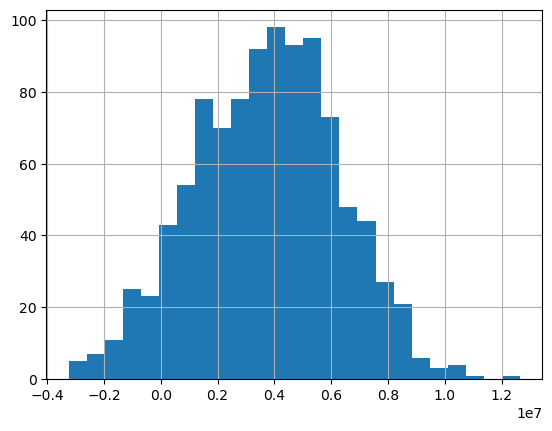

<Figure size 1200x700 with 0 Axes>

In [103]:
# Veamos como se distribuyen las medias de nuestro bootstrap
sample_0.hist(bins=25)
plt.figure(figsize=(12,7))
plt.show()

In [104]:
# Veamos el beneficio promedio de la region 0
sample_0.mean()

3743865.9238748457

In [105]:
# Veamos entonces el intervalo de confianza
print(f'Intervalo de confianza: U$({sample_0.quantile(0.025)},{sample_0.quantile(0.975)})')

Intervalo de confianza: U$(-1258188.5303111854,8432791.112776903)


Por lo tanto, tenemos un intervalo de confianza del 95% que cubre desde -1.317.952 dolares hasta 8.695.669 dolares con 3.893.728 como valor medio. Claramente podemos observar que no todos los pozos de nuestras predicciones nos dan ganancias positivas, entonces cual es el riesgo de pérdida de la region 0?

In [106]:
# Veamos entonces el porcentaje de perdida!
(sample_0<0).mean()*100

7.3999999999999995

Finalmente obtuvimos el porcentaje de perdida de la region y es alrededor del 7%! Es mucho? Es poco? Primero veamos las otras regiones y decidamos!

### <a id='toc1_6_2_'></a>[geo_1](#toc0_)

In [107]:
# Entonces efectuamos bootstrap sobre los promedios de la region 1
sample_1 = bootstrap(predictions_1, 1000)

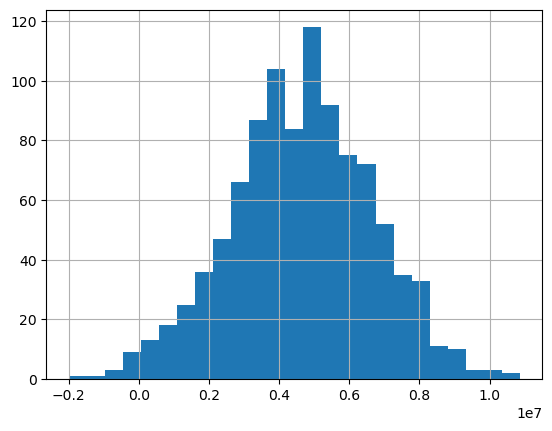

<Figure size 1200x700 with 0 Axes>

In [108]:
# Veamos como se distribuyen las medias de nuestro bootstrap
sample_1.hist(bins=25)
plt.figure(figsize=(12,7))
plt.show()

In [109]:
# Veamos el beneficio promedio de la region 1
sample_1.mean()

4643384.583398439

In [110]:
# Veamos entonces el intervalo de confianza
print(f'Intervalo de confianza: U$({sample_1.quantile(0.025)},{sample_1.quantile(0.975)})')

Intervalo de confianza: U$(493969.0261550151,8389429.24667936)


Para la región 1 tenemos un intervalo de confianza con la forma (629.844 , 8.809.107) y un promedio de 4.658.838 dolares. Al parecer la region 1 no presenta perdidas dentro del intervalo de confianza! De todas formas hay que ver la probabilidad de que tenga perdidas, las cuales seran menores al 5%.

In [111]:
# Veamos entonces el porcentaje de perdida!
(sample_1<0).mean()*100

1.3

Efectivamente, vemos un 1,4% de probabilidad de tener perdidas en la region. Un muy buen nùmero, veamos entonces la última region!

### <a id='toc1_6_3_'></a>[geo_2](#toc0_)

In [112]:
# Finalmente efectuamos bootstrap sobre los promedios de la region 2
sample_2 = bootstrap(predictions_2, 1000)

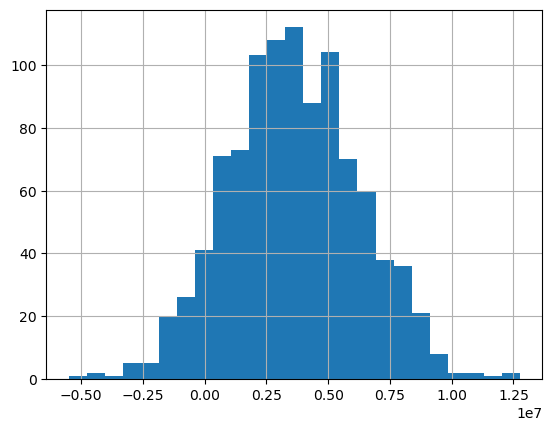

<Figure size 1200x700 with 0 Axes>

In [113]:
# Veamos como se distribuyen las medias de nuestro bootstrap
sample_2.hist(bins=25)
plt.figure(figsize=(12,7))
plt.show()

In [114]:
# Veamos el beneficio promedio de la region 2
sample_2.mean()

3621247.7524647675

In [115]:
# Veamos entonces el intervalo de confianza
print(f'Intervalo de confianza: U$({sample_2.quantile(0.025)},{sample_2.quantile(0.975)})')

Intervalo de confianza: U$(-1313732.4626973483,8764731.999709541)


Resumiendo la región 2, tenemos un intervalo de confianza que se determina con el rango (-1.893.801, 8.862.464) y una media de 3.580.360 dolares. Ésta región es la que tiene el intervalo de confianza más amplio y la media más chica de las tres, mi predicción en base a tal intervalo de confianza es que veremos el mayor riesgo de las tres regiones.

In [116]:
# Veamos entonces el porcentaje de perdida!
(sample_2<0).mean()*100

7.9

Efectivamente, con una probabilidad de perdida del 9,4% la region 2 se situa como la más riesgosa de las 3 que tenemos. Pasemos entonces a las conclusiones.
  
## <a id='toc1_7_'></a>[Conclusiones](#toc0_)
  
Veamos una tabla con las medias, los límites de los intervalos de confianza y el porcentaje de riesgo para cada región:
  
| Región | Promedio | Límite inferior | Límite superior | Riesgo de pérdida |
|----------|----------|----------|--------------|--------------|
|     0     |3893728.81|-1317952.76|8695669.91|6.7%|
|     1     |4658838.75|629844.56|8809107.07|1.4%|
|     2     |3580360.41|-1893801.82|8862464.46|9.4%|

Al parecer tenemos un ganador claro de nuestras regiones. La region 1 se ve claramente como la más prometedora en base a los resultados de bootstrapping. Con el promedio más alto, un intervalo de confianza que no toca las perdidas y el menor riesgo de pérdida por bastante no hay discusión sobre que ésta es la mejor región de las 3... O lo es?
  
Si recordamos bien, en la etapa anterior la región 0 fue la más prometedora e incluso la región 1 se ubicó al final dentro de nuestras métricas! Pero, que cambió tanto el paradigma? Si recordamos bien el EDA, el conjunto de datos de la región 1 era raro ,por decir poco, con 12 picos concentrados en números específicos. Es más que obvio que cuando elegimos los 200 mejores pozos seguramente agarramos pozos de las últimas dos columnas que se encontraban con un poco menos de 140 unidades cada uno mientras que las otras 2 regiones tenian pozos que superaban las 175 unidades. Lo que creo que pasó es que al analizar los valores sin mucho proceso las regiones 0 y 2 superaron ampliamente, pero al realizar el bootstrapping la baja varianza de los datos de la región 1 causó que sus datos se agrupen mucho más cerca de esos dos picos que mencionamos previamente, y consecuentemente dar los resultados que vemos arriba.
  
Entonces, como conclusión yo voy a recomendar la region.... 0. Simplemente no puedo recomendar una región en la que los datos iniciales presentan una forma tan antinatural que grita problemas en la pipeline. 
  
Mi recomendación completa es que se realice un backtrack de la tabla `geo_1` para identificar que causó que los datos terminen así y posteriormente realizar de vuelta los estudios con el objetivo de comparar y llegar a una conclusión más real.